In [17]:
import pandas as pd
from itables import init_notebook_mode
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


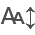

- The CSV 'Imholz_Chris_studentA_stage3.csv' has 187 rows and 22 columns.
- The CSV 'Anton_Victor_studentB_stage3.csv' has 196 rows and 3 columns.
- The CSV 'GonzalezAlonso_Rodrigo_studentC_stage3.csv' has 194 rows and 12 columns.


In [14]:
init_notebook_mode(all_interactive=True)

try:
    
    df_studentA = pd.read_csv('../data/clean_data_stage3/Imholz_Chris_studentA_stage3.csv', sep=';', on_bad_lines='skip') # Reference
    df_studentB = pd.read_csv('../data/clean_data_stage3/Anton_Victor_studentB_stage3.csv', sep=';') # Index
    df_studentC = pd.read_csv('../data/clean_data_stage3/GonzalezAlonso_Rodrigo_studentC_stage3.csv') # ROA ROE ETC

    print(f"- The CSV 'Imholz_Chris_studentA_stage3.csv' has {df_studentA.shape[0]} rows and {df_studentA.shape[1]} columns.")
    print(f"- The CSV 'Anton_Victor_studentB_stage3.csv' has {df_studentB.shape[0]} rows and {df_studentB.shape[1]} columns.")
    print(f"- The CSV 'GonzalezAlonso_Rodrigo_studentC_stage3.csv' has {df_studentC.shape[0]} rows and {df_studentC.shape[1]} columns.")

except Exception as e:
    print(f"An error occurred: {e}")

df = pd.merge(df_studentA, df_studentC, left_on='ISIN Code', right_on='ISIN', how='inner')
df = pd.merge(df, df_studentB, left_on='TICKER', right_on='Ticker', how='inner')
df.columns = df.columns.str.title()

In [15]:
df.columns

Index(['Name', 'Currency', 'Market Cap',
       'Carbon Footprint (Total Ghg Emissions / Enterprise Value)', 'Type',
       'Sub Type', 'Market', 'Isin Code', 'Industry', 'Supersector', 'Sector',
       'Subsector', 'Average Training Hours Per Employee',
       'Number Of Female Board Members', 'Number Of Board Members',
       'Share Of Women In Total Workforce In %',
       'Share Of Women In Management Bodies In %', 'Gender Pay Gap In %',
       'Rate Of Employees With Disabilities In %',
       'Board Gender Diversity (Female Board Members / Total Board Members) In %',
       'Total Energy Consumption In Mwh', 'Rate Of Resignation In %',
       'Component', 'Isin', 'Ticker', 'Trading Location', 'Issuer Country',
       'Turnover', 'Turnover In Eur', 'Volume', 'Roa', 'Roe', 'Roic', 'Ccy',
       'Index', 'Component', 'Ticker'],
      dtype='object')

In [19]:
columns_order  = ['Name', 
                  'Market Cap',
                  'Currency',
                  'Market',
                  'Index',
                  'Isin Code',
                  'Turnover In Eur',
                  "Issuer Country",
                  'Industry', 
                  'Supersector', 
                  'Sector',
                  'Subsector', 
                  'Average Training Hours Per Employee',
                  'Number Of Female Board Members', 
                  'Number Of Board Members',
                  'Share Of Women In Total Workforce In %',
                  'Share Of Women In Management Bodies In %', 
                  'Gender Pay Gap In %',
                  'Rate Of Employees With Disabilities In %',
                  'Board Gender Diversity (Female Board Members / Total Board Members) In %',
                  'Total Energy Consumption In Mwh', 
                  'Rate Of Resignation In %',
                  'Carbon Footprint (Total Ghg Emissions / Enterprise Value)_in_USD',
                  'Roa', 
                  'Roe', 
                  'Roic'
       ]

df = df[columns_order]


KeyError: "['Carbon Footprint (Total Ghg Emissions / Enterprise Value)_in_USD'] not in index"

In [20]:
print(df.dtypes)

Name                                                                         object
Currency                                                                     object
Market Cap                                                                  float64
Carbon Footprint (Total Ghg Emissions / Enterprise Value)                    object
Type                                                                         object
Sub Type                                                                     object
Market                                                                       object
Isin Code                                                                    object
Industry                                                                     object
Supersector                                                                  object
Sector                                                                       object
Subsector                                                                   

In [21]:
df

Name Currency    Market Cap  \
0               ACCOR      EUR  9.656000e+09   
1         AIR LIQUIDE      EUR  9.825800e+10   
2           AIRBUS SE      EUR  1.272570e+11   
3    ARCELORMITTAL SA      EUR  2.033100e+10   
4    ARCELORMITTAL SA      EUR  2.033100e+10   
..                ...      ...           ...   
222     RECORDATI ORD      EUR  1.040200e+10   
223              SNAM      EUR  1.428400e+10   
224    TELECOM ITALIA      EUR  3.357000e+09   
225             TERNA      EUR  1.460500e+10   
226            UNIPOL      EUR  5.833000e+09   

    Carbon Footprint (Total Ghg Emissions / Enterprise Value)   Type  \
0                           535.17 Ton / Million (EUR)         Stock   
1                                                  NaN         Stock   
2                                                  NaN         Stock   
3                        3,373.201 Ton / Million (USD)         Stock   
4                        3,373.201 Ton / Million (USD)         Stock   
..                                                 ...           ...   
222                                                NaN         Stock   
223                        98.6156 Ton / Million (EUR)         Stock   
224                         124.89 Ton / Million (EUR)         Stock   
225                       132.1212 Ton / Million (EUR)         Stock   
226                       476.3635 Ton / Million (EUR)         Stock   

            Sub Type              Market     Isin Code  \
0    Ordinary Shares      Euronext Paris  FR0000120404   
1    Ordinary Shares      Euronext Paris  FR0000120073   
2    Ordinary Shares      Euronext Paris  NL0000235190   
3    Ordinary Shares  Euronext Amsterdam  LU1598757687   
4    Ordinary Shares  Euronext Amsterdam  LU1598757687   
..               ...                 ...           ...   
222  Ordinary Shares      Euronext Milan  IT0003828271   
223  Ordinary Shares      Euronext Milan  IT0003153415   
224  Ordinary Shares      Euronext Milan  IT0003497168   
225  Ordinary Shares      Euronext Milan  IT0003242622   
226  Ordinary Shares      Euronext Milan  IT0004810054   

                       Industry                          Supersector  ...  \
0    40, Consumer Discretionary             4050, Travel and Leisure  ...   
1           55, Basic Materials                      5520, Chemicals  ...   
2               50, Industrials  5020, Industrial Goods and Services  ...   
3           55, Basic Materials                5510, Basic Resources  ...   
4           55, Basic Materials                5510, Basic Resources  ...   
..                          ...                                  ...  ...   
222             20, Health Care                    2010, Health Care  ...   
223                  60, Energy                         6010, Energy  ...   
224      15, Telecommunications             1510, Telecommunications  ...   
225               65, Utilities                      6510, Utilities  ...   
226              30, Financials                      3030, Insurance  ...   

         Turnover Turnover In Eur       Volume  Roa   Roe  Roic  Ccy   Index  \
0    4.412293e+07    4.412293e+07    1016775.0  4.0  11.9   8.0  EUR  CAC_40   
1    1.176671e+08    1.176671e+08     609693.0  6.1  12.9  12.1  EUR  CAC_40   
2    1.657425e+08    1.657425e+08     969451.0  2.3  23.5  13.5  EUR  CAC_40   
3    4.432131e+07    4.432131e+07    1738641.0  2.1   1.8   4.5  EUR  CAC_40   
4    4.432131e+07    4.432131e+07    1738641.0  2.1   1.8   4.5  EUR  CAC_40   
..            ...             ...          ...  ...   ...   ...  ...     ...   
222           NaN             NaN          NaN  9.4  24.1  16.9  NaN     MIB   
223  2.722901e+07    2.722901e+07    6217983.0  3.3  15.5   6.4  EUR     MIB   
224  3.329250e+07    3.329250e+07  147625871.0  1.4   NaN   2.7  EUR     MIB   
225  2.805781e+07    2.805781e+07    3654952.0  4.0  14.1   8.1  EUR     MIB   
226  1.148265e+07    1.148265e+07    1480777.0  1.9  14.5  15.2  EUR     

# ESG Indexes | Questions

## Question 1 | Which are the most and less polluting companies listed on Europe's main indexes provided by Euronext regarding its size measured by sales volume and market capitalization?  

With this question we seek to find our European Sustainable champions. To facilitate the comparison we will make adjustments. 

In [12]:
# Chris

## Question 1 | Conclusion

## Question 2 | What is the Euronext Index with components that perform best in terms of environmental and social responsibility?

This question aims to identify the leading index by examining various indicators, including **Carbon Footprint**, **Energy Consumption**, **the Percentage of Women in the Total Workforce and in Management Positions**, **the Gender Pay Gap**, and **the Employment Rate of Individuals with Disabilities**. 

We are looking to determine the top performers according to assessments by prominent rating agencies like S&P, Moody's, and MSCI.

In [14]:
df_final = df.copy()

# Drop rows with NaN values in the specified columns
df_final.dropna(subset=['Carbon Footprint (Total Ghg Emissions / Enterprise Value)', 'Total Energy Consumption In Mwh'], inplace=True)

#Convert Footprint to float
def convert_to_float(value):
    if isinstance(value, str):  # Check if the value is a string
        number = ''.join(filter(str.isdigit, value))
        return float(number) if number else float('nan')
    elif pd.isna(value):  # If the value is NaN, simply return NaN
        return float('nan')
    else:  # If it's not a string and not NaN, assume it's already numeric
        return float(value)

df_final['Carbon Footprint (Total Ghg Emissions / Enterprise Value)'] = df_final['Carbon Footprint (Total Ghg Emissions / Enterprise Value)'].apply(convert_to_float)

# Convert values of 'Total Energy Consumption In Mwh' from Wh to MWh
df_final['Total Energy Consumption In Mwh'] = df_final['Total Energy Consumption In Mwh'] / 1000000  # Divide by 1 million to convert from Wh to MWh

# Check the resulting DataFrame
print(df_final.head())


               Name    Market Cap Currency              Market   Index  \
0             ACCOR  9.656000e+09      EUR      Euronext Paris  CAC_40   
3  ARCELORMITTAL SA  2.033100e+10      EUR  Euronext Amsterdam  CAC_40   
4  ARCELORMITTAL SA  2.033100e+10      EUR  Euronext Amsterdam  CAC_40   
5  ARCELORMITTAL SA  2.033100e+10      EUR  Euronext Amsterdam     AEX   
6  ARCELORMITTAL SA  2.033100e+10      EUR  Euronext Amsterdam  CAC_40   

      Isin Code  Turnover In Eur Issuer Country                    Industry  \
0  FR0000120404     4.412293e+07         France  40, Consumer Discretionary   
3  LU1598757687     4.432131e+07     Luxembourg         55, Basic Materials   
4  LU1598757687     4.432131e+07     Luxembourg         55, Basic Materials   
5  LU1598757687     4.432131e+07     Luxembourg         55, Basic Materials   
6  LU1598757687     4.432131e+07     Luxembourg         55, Basic Materials   

                Supersector  ... Share Of Women In Management Bodies In %  \
0  

### Energy Consumption and Carbon Footprint by Index

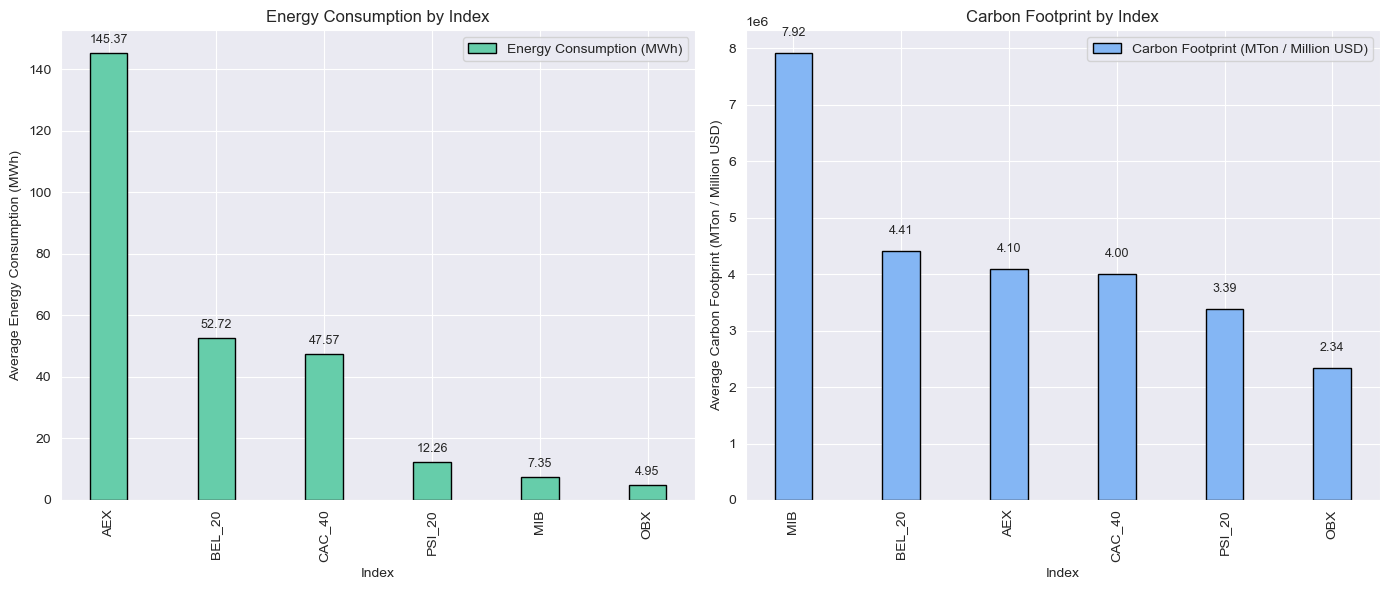

In [15]:
### ENERGY CONSUMPTION
# Group data by 'Index', calculate the average energy consumption, and filter out the 'ISEQ' index
avg_energy_consumption = df_final[df_final['Index'] != 'ISEQ'].groupby('Index').agg(
    {'Total Energy Consumption In Mwh': 'mean'}
).reset_index()

# Sort descending
avg_energy_consumption = avg_energy_consumption.sort_values(by='Total Energy Consumption In Mwh', ascending=False)

### CARBON FOOTPRINT
# Group data by 'Index', calculate the average carbon footprint, and filter out the 'ISEQ' index
avg_carbon_footprint = df_final[df_final['Index'] != 'ISEQ'].groupby('Index').agg(
    {'Carbon Footprint (Total Ghg Emissions / Enterprise Value)': 'mean'}
).reset_index()

# Sort descending
avg_carbon_footprint = avg_carbon_footprint.sort_values(by='Carbon Footprint (Total Ghg Emissions / Enterprise Value)', ascending=False)


# PLOTS
# Set up the figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Width and positions
bar_width = 0.35
indexes = np.arange(len(avg_energy_consumption['Index']))

### ENERGY CONSUMPTION
# Plot 1st subplot
bars1 = ax1.bar(indexes, avg_energy_consumption['Total Energy Consumption In Mwh'], 
                bar_width, label='Energy Consumption (MWh)', color='#66CDAA', edgecolor='black')
ax1.set_xlabel('Index')
ax1.set_ylabel('Average Energy Consumption (MWh)')
ax1.set_title('Energy Consumption by Index')
ax1.set_xticks(indexes)
ax1.set_xticklabels(avg_energy_consumption['Index'], rotation=90)
ax1.legend()

# Data Labels
for bar in bars1:
    height = bar.get_height()
    ax1.annotate(f'{height:.2f}', 
                 (bar.get_x() + bar.get_width() / 2, height), 
                 ha='center', va='bottom',
                 textcoords="offset points", xytext=(0,5), fontsize=9)

### CARBON FOOTPRINT
# Plot 2nd subplot
bars2 = ax2.bar(indexes, avg_carbon_footprint['Carbon Footprint (Total Ghg Emissions / Enterprise Value)'], 
                bar_width, label='Carbon Footprint (MTon / Million USD)', color='#84b6f4', edgecolor='black')
ax2.set_xlabel('Index')
ax2.set_ylabel('Average Carbon Footprint (MTon / Million USD)')
ax2.set_title('Carbon Footprint by Index')
ax2.set_xticks(indexes)
ax2.set_xticklabels(avg_carbon_footprint['Index'], rotation=90)
ax2.legend()

# Convert nummbers to MTon and add Data Labels
for bar in bars2:
    height = bar.get_height()
    mega_ton = height / 1e6  
    ax2.annotate(f'{mega_ton:.2f}', 
                 (bar.get_x() + bar.get_width() / 2, height), 
                 ha='center', va='bottom',
                 textcoords="offset points", xytext=(0,10), fontsize=9)

plt.tight_layout()
plt.show()


The side-by-side plots compare the **average energy consumption** and **carbon footprint** of different indexes.

- **Energy Consumption.** On the left plot for energy consumption in MWh shows significant differences between the indexes. 
The **AEX** index stands out for its significantly higher energy consumption, which at **145.37 MWh** is almost three times higher than its nearest competitor, the **BEL-20**, at **52.72 MWh**. This significant consumption points to the need for energy efficiency and sustainability measures within the companies represented by the **AEX** index.

- **Carbon Footprint.** On the right plot, measured in tonnes per million USD, shows that MIB has the highest carbon footprint at **7.92 tonnes**, suggesting a greater environmental impact per unit of economic value generated. **BEL-20** and **AEX** follow with **4.4**1 and **4.10 tonnes** respectively, indicating varying degrees of greenhouse gas emissions relative to their enterprise value.

Taken together, these charts highlight the environmental impact and sustainability challenges of the indexes. While energy consumption and carbon footprint are related, the disparity between the two charts suggests that some indexes may be more carbon efficient than others, or may be investing in cleaner energy sources. Insights from these visualisations could guide sustainable investment decisions and encourage the adoption of greener practices.

### Gender Diversity & Pay Gap by Index

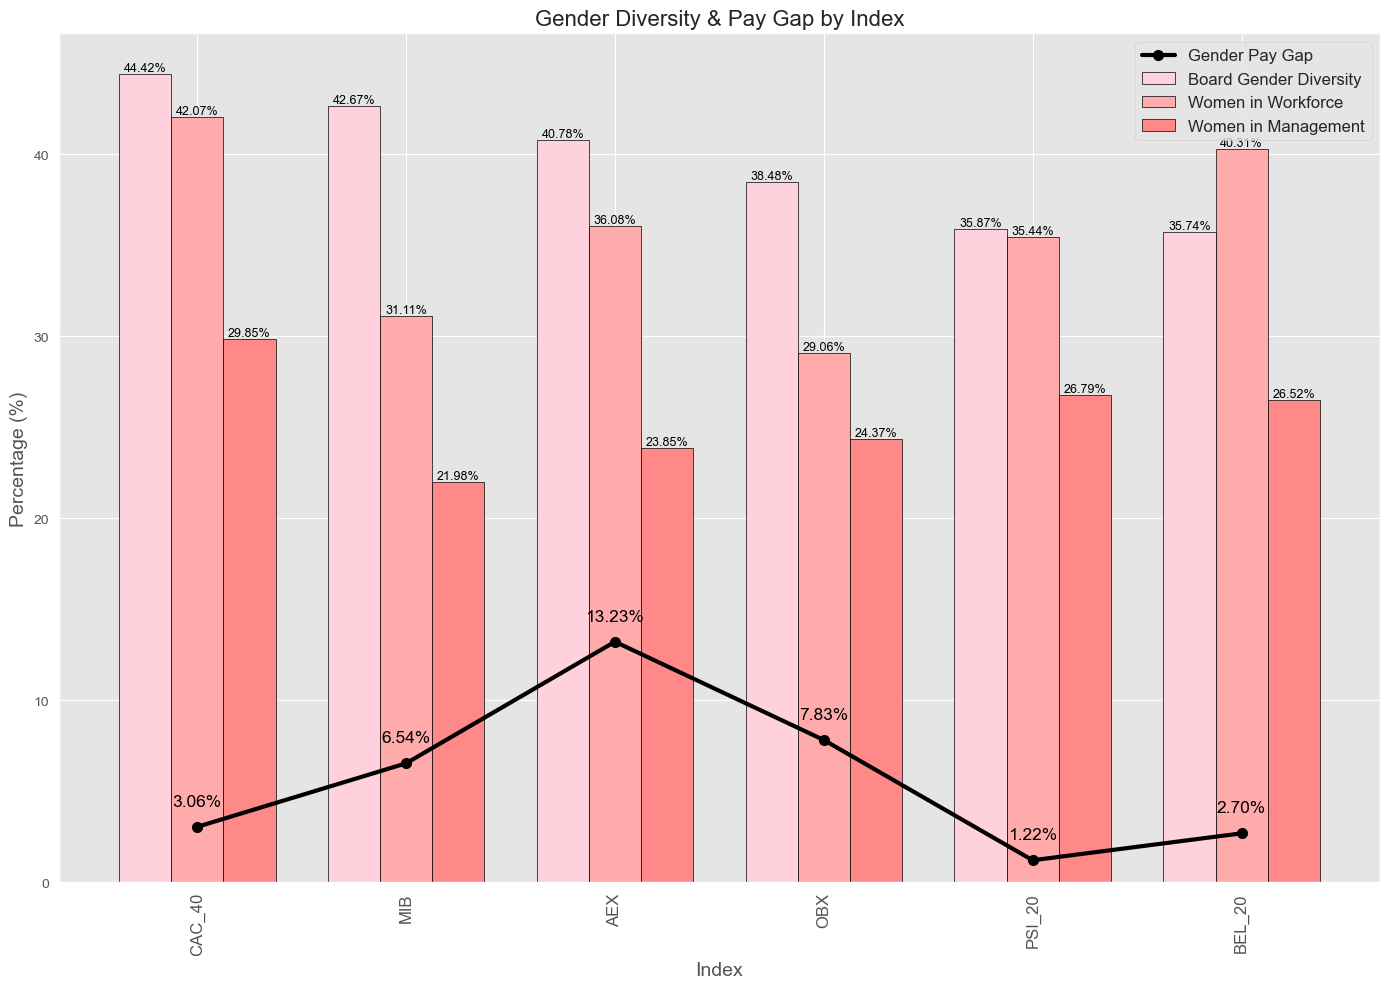

In [19]:
# Group data by 'Index', calculate the mean, and exclude 'ISEQ'
avg_gender_data = df_final[df_final['Index'] != 'ISEQ'].groupby('Index').agg({
    'Board Gender Diversity (Female Board Members / Total Board Members) In %': 'mean',
    'Share Of Women In Total Workforce In %': 'mean',
    'Share Of Women In Management Bodies In %': 'mean',
    'Gender Pay Gap In %': 'mean'  # Adding the new column to aggregate
}).reset_index()

# Transform the data into percentages
avg_gender_data['Board Gender Diversity %'] = avg_gender_data['Board Gender Diversity (Female Board Members / Total Board Members) In %'] * 100
avg_gender_data['Women in Workforce %'] = avg_gender_data['Share Of Women In Total Workforce In %'] * 100
avg_gender_data['Women in Management %'] = avg_gender_data['Share Of Women In Management Bodies In %'] * 100
avg_gender_data['Gender Pay Gap %'] = avg_gender_data['Gender Pay Gap In %']  * 100 

# Sort the bars within each index group
avg_gender_data.sort_values(by=['Board Gender Diversity %', 'Women in Workforce %', 'Women in Management %', 'Gender Pay Gap %'],
                            ascending=False, inplace=True)

indexes = np.arange(len(avg_gender_data['Index']))

# Plot
plt.figure(figsize=(14, 10))
plt.style.use('ggplot')
plt.bar(indexes - 0.25, avg_gender_data['Board Gender Diversity %'], 
        0.25, label='Board Gender Diversity', color='#FFD1DC', edgecolor='black')
plt.bar(indexes, avg_gender_data['Women in Workforce %'], 
        0.25, label='Women in Workforce', color='#FFABAB', edgecolor='black')
plt.bar(indexes + 0.25, avg_gender_data['Women in Management %'], 
        0.25, label='Women in Management', color='#FF8888', edgecolor='black')
plt.plot(indexes, avg_gender_data['Gender Pay Gap %'], color='black', marker='o', linestyle='-', linewidth=3, markersize=7, label='Gender Pay Gap')
plt.xlabel('Index', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.title('Gender Diversity & Pay Gap by Index', fontsize=16)
plt.xticks(indexes, avg_gender_data['Index'], rotation=90, fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()

# Data labels
for i, rect in enumerate(plt.gca().patches):
    plt.gca().text(rect.get_x() + rect.get_width() / 2, rect.get_height(), 
                   f'{rect.get_height():.2f}%', ha='center', va='bottom', fontsize=9, color='black')
    
# Data labels for line plot
for i, value in enumerate(avg_gender_data['Gender Pay Gap %']):
    plt.text(indexes[i], value + 1, f'{value:.2f}%', ha='center', va='bottom', fontsize=12.5, color='black')

plt.show()



In this visual representation of gender diversity and pay gap by index, it's clear that while some indices have made progress in gender diversity in their workforce and management, the pay gap remains a critical issue.

We focus on the top three indices based on the combined factors of ****board gender diversity****, ****women in the workforce****, ****women in management**** and the ****gender pay gap****:

- **CAC-40** stands out with the **highest** percentage of board **gender diversit**y at **44.42%** and a significant representation of women in management at **29.85%**. However, it has the widest gender pay gap of the group, suggesting that despite having a diverse board and management, remuneration is unequal between the genders.

- **AEX** has a commendable **42.67%** female representation in management, indicating a strong presence of women in leadership roles. However, it has a significant **gender pay gap** of **13.23%**, which significantly undermines the positive aspect of women's representation in senior management. This pay gap casts a shadow over the index, as it implies that gender parity in leadership does not necessarily translate into equal pay.

- **PSI-20** shows relatively **lower** percentages across the board for **gender diversity** metrics, but has a smaller pay gap of **1.22%** compared to the **CAC-40** and **AEX**. This suggests greater gender pay equity within the companies in this index, despite lower overall gender representation in management and on the board.

The **AEX** index shows that higher female representation in management does not necessarily lead to pay parity, as it has a significant gender pay gap. This suggests that achieving gender equality is not only about representation in senior positions, but also about ensuring equal pay. The situation highlights the multifaceted nature of gender diversity and the need for a comprehensive approach to address all aspects of gender equality in the workplace.

### Employees with Disabilities by Index

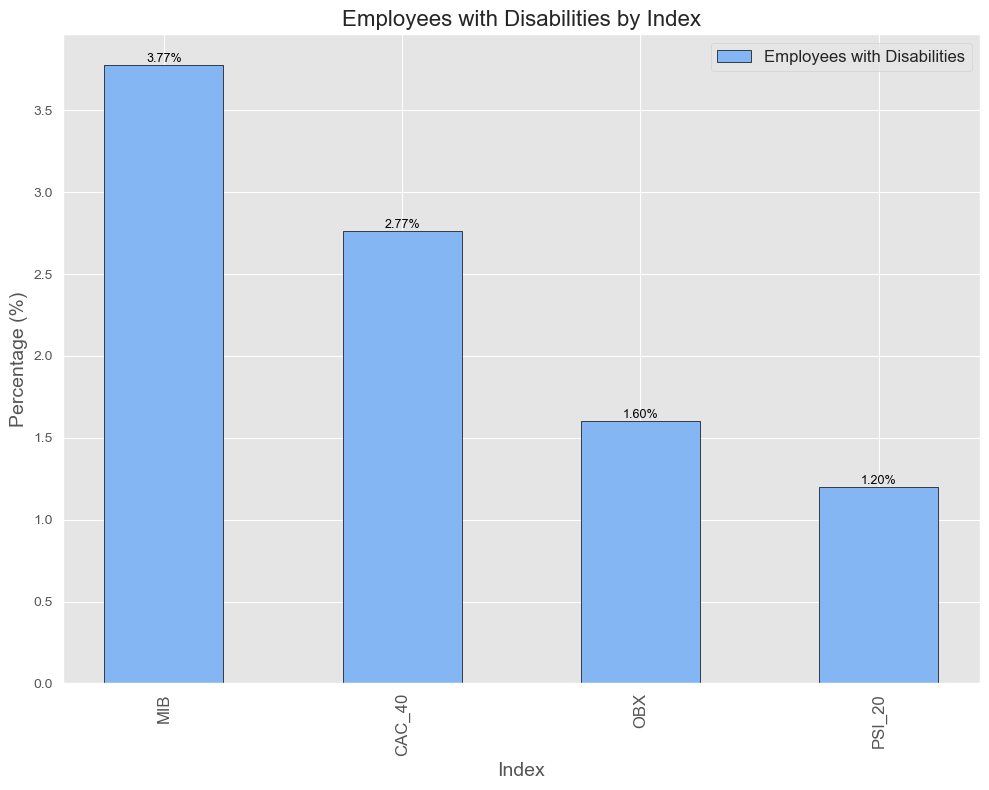

In [17]:
# Group data by 'Index', calculate the mean for 'Rate Of Employees With Disabilities In %', and exclude 'ISEQ'
avg_disability_data = df_final[df_final['Index'] != 'ISEQ'].groupby('Index').agg({
    'Rate Of Employees With Disabilities In %': 'mean'
}).reset_index()

# Convert this to a percentage
avg_disability_data['Rate Of Employees With Disabilities %'] = avg_disability_data['Rate Of Employees With Disabilities In %'] * 100

# Filter out 'AEX' and 'BEL_20' if they have no values
avg_disability_data_filtered = avg_disability_data[~avg_disability_data['Index'].isin(['AEX', 'BEL_20'])]

# Sort in descending order
avg_disability_data_sorted = avg_disability_data_filtered.sort_values(by='Rate Of Employees With Disabilities %', ascending=False)

indexes = np.arange(len(avg_disability_data_sorted['Index']))

# Plot
plt.figure(figsize=(10, 8))
plt.style.use('ggplot')
plt.bar(indexes, avg_disability_data_sorted['Rate Of Employees With Disabilities %'],
        0.5, label='Employees with Disabilities', color='#84b6f4', edgecolor='black')
plt.xlabel('Index', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.title('Employees with Disabilities by Index', fontsize=16)
plt.xticks(indexes, avg_disability_data_sorted['Index'], rotation=90, fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()

# Data Labels
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height,
                   f'{height:.2f}%', ha='center', va='bottom', fontsize=9, color='black')
    
plt.show()


The plot shows the percentage of employees with disabilities according to different indexes, comparing the **MIB**, the **CAC-40**, the **OBX** and the **PSI-20**. 

Notably, the **AEX** and **BEL-20** indexes are not included in this visualisation. The exclusion of the **AEX** and **BEL-20** is specifically due to the fact that these indexes reportedly have no employees with disabilities, which corresponds to a **rate** of **0%**. As such, they have been excluded from the plot in order to focus only on those indexes where there is a measurable proportion of employees with disabilities. 

The visualisation effectively conveys the relative differences between the indexes shown, with **MIB** having the **highest rate** at **3.77%** and **PSI-20** the **lowest** at **1.20%**.

### Calculation of the most responsible ESG Index in terms of Enviromental & Social Scores

In [18]:
# Save in libraries values from plots
energy_consumptions = {
    'AEX': 145.37, 'BEL-20': 52.72, 'CAC-40': 47.57, 'PSI-20': 12.26,
    'MIB': 7.35, 'OBX': 4.95
}
carbon_footprints = {'MIB': 7.92, 'BEL-20': 4.41, 'AEX': 4.10, 'CAC-40': 4.00, 'PSI-20': 3.39,'OBX': 2.34}

gender_diversity = {
    'Board Gender Diversity': {'CAC-40': 44.42, 'MIB': 36.08, 'OBX': 35.87, 'PSI-20': 40.78, 'AEX': 31.11, 'BEL-20': 42.07},
    'Women in Workforce': {'CAC-40': 31.11, 'MIB': 21.98, 'OBX': 35.74, 'PSI-20': 38.48, 'AEX': 36.08, 'BEL-20': 29.85},
    'Women in Management': {'CAC-40': 42.67, 'MIB': 29.06, 'OBX': 35.44, 'PSI-20': 35.74, 'AEX': 23.85, 'BEL-20': 40.31},
}

gender_pay_gap = {'CAC-40': 13.23, 'MIB': 6.54, 'OBX': 1.22, 'PSI-20': 2.07, 'AEX': 7.83, 'BEL-20': 2.70}

disabilities = {
    'MIB': 3.77, 'CAC-40': 2.77, 'OBX': 1.60, 'PSI-20': 1.20
}


# Calculate environmental and social scores
def calculate_scores(energy, carbon, diversity, pay_gap, disabilities):
    # Calculate the environmental scores (lower values are better)
    min_energy = min(energy.values())
    min_carbon = min(carbon.values())
    env_scores = {k: ((min_energy / v) * 50 + (min_carbon / carbon[k]) * 50) for k, v in energy.items()}
    
    # Calculate the social scores (higher values are better)
    max_diversity = {category: max(values.values()) for category, values in diversity.items()}
    max_pay_gap = max(pay_gap.values())
    max_disabilities = max(disabilities.values())
    
    # Normalize gender diversity and pay gap scores between 0 and 100
    social_scores = {}
    for index in energy.keys():
        diversity_scores = sum((value / max_diversity['Board Gender Diversity']) * 100 for category, value in diversity['Board Gender Diversity'].items() if category == index)
        pay_gap_score = (pay_gap.get(index, 0) / max_pay_gap) * 100
        disability_score = (disabilities.get(index, 0) / max_disabilities) * 100
        
        # Average the diversity and pay gap scores, then average with disability score
        social_scores[index] = (diversity_scores + pay_gap_score + disability_score) / 3
    
    # Combine environmental and social scores for overall score
    overall_scores = {k: (env_scores[k] + social_scores[k]) / 2 for k in env_scores}
    
    return env_scores, social_scores, overall_scores

# Execute the score calculation
env_scores, social_scores, overall_scores = calculate_scores(
    energy_consumptions,
    carbon_footprints,
    gender_diversity,
    gender_pay_gap,
    disabilities
)

# Print results
print("Environmental Scores:")
for company, score in env_scores.items():
    print(f"{company}: {score:.2f}")

print("\nSocial Scores:")
for company, score in social_scores.items():
    print(f"{company}: {score:.2f}")

print("\nOverall Scores:")
for company, score in overall_scores.items():
    print(f"{company}: {score:.2f}")


Environmental Scores:
AEX: 30.24
BEL-20: 31.23
CAC-40: 34.45
PSI-20: 54.70
MIB: 48.45
OBX: 100.00

Social Scores:
AEX: 43.07
BEL-20: 38.37
CAC-40: 91.16
PSI-20: 46.43
MIB: 76.89
OBX: 44.14

Overall Scores:
AEX: 36.66
BEL-20: 34.80
CAC-40: 62.81
PSI-20: 50.56
MIB: 62.67
OBX: 72.07


## Question 2 | Conclusion


Based on the calculated environmental and social responsibility scores for each index:

**Environmental responsibility:**
- The **OBX** index has the highest environmental responsibility score of 100.00, indicating the best performance in terms of lower energy consumption and carbon footprint.
- The **AEX** Index follows closely with a score of 30.24, while the other indices have scores ranging from 31.23 to 54.70.

**Social responsibility:**
- The **CAC-40** index has the highest social responsibility score of 91.16, indicating better gender diversity, lower gender pay gap and greater inclusion of employees with disabilities.
- The **MIB** index follows with a score of 76.89, indicating relatively good social responsibility performance.
- The other indices have social responsibility scores ranging from 38.37 to 46.43.

**Overall conclusion:**
- The **OBX** index excels in environmental responsibility, but lags behind other indices in social responsibility.
- The **CAC-40** index excels in social responsibility, while maintaining a moderate level of environmental responsibility.
- The **MIB** index shows a balanced performance in both environmental and social responsibility, positioning it as a strong contender overall.
- The **AEX**, **BEL-20** and **PSI-20** indices show relatively moderate performance in terms of both environmental and social responsibility.

Based on these results, stakeholders seeking investments with a strong environmental focus may prefer the **OBX** index, while those prioritising social responsibility may prefer the **CAC-40** index. However, for a more balanced approach, the MIB index could be considered an appropriate choice.

## Question 3 | How do the main European companies that have a great ESG rating behave compared to those that do not, measured through key financial ratios such as ROA, ROE, ROIC?  

In [ ]:
# Rodrigo

## Question 3 | Conclusion